# Importing The Libs

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: Defining The Dictionaries

In [ ]:
text = ["All that we are is the result of what we have thought",
        "To be or not to be that is the question",
        "Be yourself everyone else is already taken"]

all_words = re.split( "\s", " ".join(text).lower() )

vocab = sorted(set(all_words))

print(f"There are {len(all_words)} words in the text and It contains {len(vocab)} unique words.")
print(all_words)

word2idx = {}
for i, word in enumerate(vocab):
    word2idx[word] = i

idx2word = {}
for i, word in enumerate(vocab):
    idx2word[i] = word

There are 29 words in the text and It contains 21 unique words.
['all', 'that', 'we', 'are', 'is', 'the', 'result', 'of', 'what', 'we', 'have', 'thought', 'to', 'be', 'or', 'not', 'to', 'be', 'that', 'is', 'the', 'question', 'be', 'yourself', 'everyone', 'else', 'is', 'already', 'taken']


# Exercise 2: Defining Encoder And Decoder Functions

In [ ]:
def encoder(x):
    numbers = []
    for i in x:
        numbers.append(word2idx[i])
    return numbers

def decoder(x):
    words = []
    for i in x:
        words.append(idx2word[i])
    return words

new_text = "We already are the result of what everyone else already thought"
all_newText_words = re.split("\s", new_text.lower())

encoded_newText = encoder(all_newText_words)
decoded_newText = decoder(encoded_newText)

print("New Text:")
print(f"\t{new_text}")

print("\nToken IDs:")
print(f"\t{encoded_newText}")

print("\nDecoded Text:")
print(f"\t{decoded_newText}")

New Text:
	We already are the result of what everyone else already thought

Token IDs:
	[18, 1, 2, 15, 12, 9, 19, 5, 4, 1, 16]

Decoded Text:
	['we', 'already', 'are', 'the', 'result', 'of', 'what', 'everyone', 'else', 'already', 'thought']


# Exercise 3: Visualize The Tokenized Integers

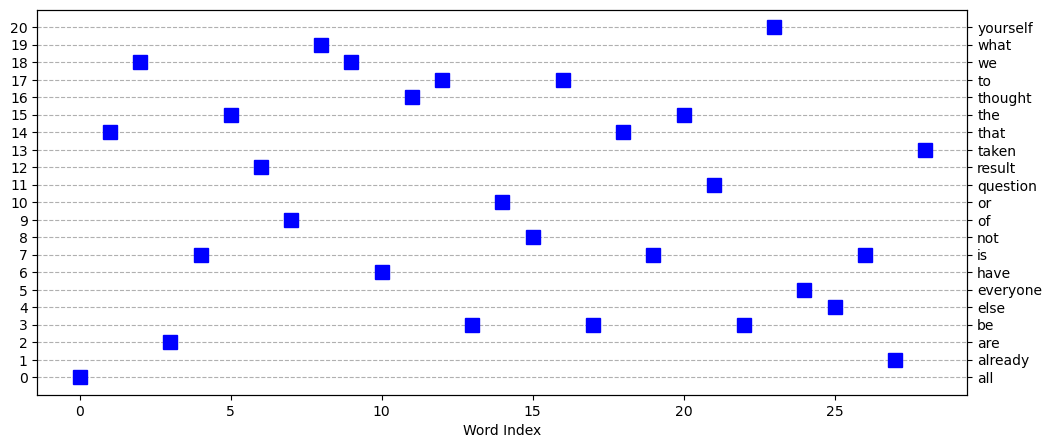

In [ ]:
# I got some help in here

tokens = encoder(all_words)

_, ax = plt.subplots(1, figsize=(12,5))

ax.plot(tokens, "bs", markersize=10)
ax.set(xlabel="Word Index", yticks=range(len(vocab)))
ax.grid(linestyle="--", axis="y")

ax2 = ax.twinx()
ax2.plot(tokens, alpha=0)
ax2.set(yticks=range(len(vocab)), yticklabels=vocab)

plt.show()

# Exercise 4: Explore Context Surrounding Target Tokens

In [32]:
# I got some help in here

target_word = "to"
target_token = word2idx[target_word]

target_Locs = np.where(np.array(all_words)==target_word)[0]
print(f"'{target_word}' appears at indices {target_Locs}\n")

for t in target_Locs:
    print(tokens[t-1:t+2])
    print(" ".join(all_words[t-1:t+2]), "\n")

'to' appears at indices [12 16]

[16, 17, 3]
thought to be 

[8, 17, 3]
not to be 



# Exercise 5: One-hot encoding

In [ ]:
arrayTokens= np.array(tokens)

oneHot_Enc = np.zeros((29,21), dtype=int)
print(f"One-hot encoding matrix is of size {oneHot_Enc.shape}\n")

for i, num in enumerate(arrayTokens):
    oneHot_Enc[i,num] = 1

print(oneHot_Enc)

One-hot encoding matrix is of size (29, 21)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 

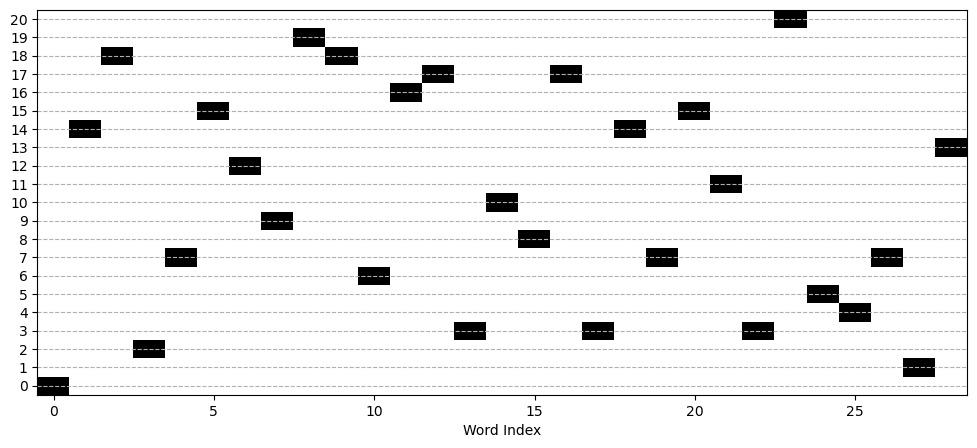

In [ ]:
_, ax= plt.subplots(1, figsize=(12,5))

plt.imshow(1-oneHot_Enc.T, cmap='gray', origin='lower', aspect='auto')
ax.set(xlabel='Word Index', yticks=range(len(vocab)))
ax.grid(linestyle='--', axis='y')

plt.show()